Minimum point (step size = 0.001 ): [-2.59035596 -0.29001159 -0.7208706  -1.93083412]
Number of iterations: 1000
Minimum point (step size = 1e-05 ): [-3.14391226  0.34023257  1.15636948 -0.51143553]
Number of iterations: 1000


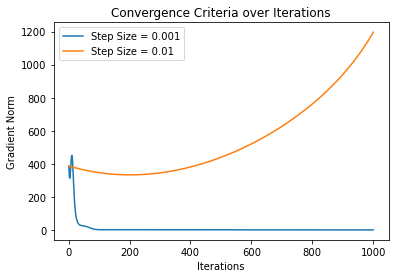

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x[0] - 10 * x[1]) ** 2 + 5 * (x[2] - x[3]) ** 2 + (x[1] - 2 * x[2]) ** 4 + 10 * (x[0] - x[3]) ** 4

def gradient(x):
    grad = np.zeros_like(x)
    grad[0] = 2 * (x[0] - 10 * x[1]) * 4 * (x[0] - x[3]) ** 3
    grad[1] = -20 * (x[0] - 10 * x[1]) + 4 * (x[1] - 2 * x[2]) ** 3
    grad[2] = 10 * (x[2] - x[3]) - 8 * (x[1] - 2 * x[2]) ** 3
    grad[3] = -10 * (x[2] - x[3]) - 40 * (x[0] - x[3]) ** 3
    return grad

def gradient_descent(initial_x, step_size, max_iterations, tolerance):
    x = initial_x
    iterations = 0
    history = []
    gradient_norms = []

    for i in range(max_iterations):
        grad = gradient(x)
        x = x - step_size * grad

        # Convergence check based on the norm of the gradient
        gradient_norm = np.linalg.norm(grad)
        gradient_norms.append(gradient_norm)

        if gradient_norm < tolerance:
            break

        # Store the history for contour plotting
        history.append(x.copy())
        iterations += 1

    return x, iterations, history, gradient_norms

# Given values
initial_x = np.array([1, 2, 2, 2])

# Convergence criteria
tolerance = 1e-6

# Maximum number of iterations
max_iterations = 1000

# Step sizes
step_size1 = 0.001
step_size2 = 0.00001

# Perform gradient descent with different step sizes
min_point1, iterations1, history1, gradient_norms1 = gradient_descent(initial_x, step_size1, max_iterations, tolerance)
min_point2, iterations2, history2, gradient_norms2 = gradient_descent(initial_x, step_size2, max_iterations, tolerance)

print("Minimum point (step size =", step_size1, "):", min_point1)
print("Number of iterations:", iterations1)
print("Minimum point (step size =", step_size2, "):", min_point2)
print("Number of iterations:", iterations2)

# Plot convergence criteria over iterations
plt.figure()
min_iterations = min(iterations1, iterations2)
plt.plot(range(1, min_iterations + 1), gradient_norms1[:min_iterations], label='Step Size = 0.001')
plt.plot(range(1, min_iterations + 1), gradient_norms2[:min_iterations], label='Step Size = 0.01')
plt.xlabel('Iterations')
plt.ylabel('Gradient Norm')
plt.title('Convergence Criteria over Iterations')
plt.legend()
plt.show()
